In [2]:
import draw2Svg as dw

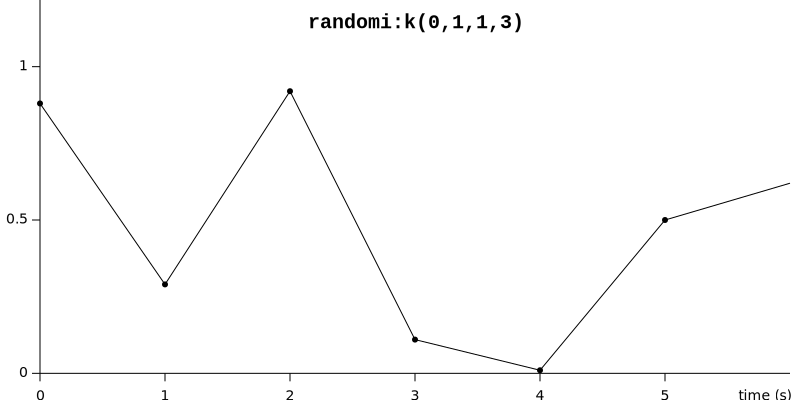

In [63]:
w,h = 800,400
d = dw.Drawing(w,h)

xnum = 7 # posts (= one more than divisions)
ynum = 7
mleft = 40
mright = 10
mtop = -10
mbot = -50
xsize = w-mleft-mright
ysize = h-mtop-mbot
xunit = xsize / (xnum-1)
yunit = ysize / (ynum-1)

exec(open('draw2Svg_funs.py').read())

def xgrid(inval):
    """for xnum=4, inval is from 0 (left) to 3 (right)
    as range to write"""
    return scale(inval,0,xnum-1,mleft,mleft+xsize)

def ygrid(inval):
    """for num=11, inval is from 0 (top) to 10 (bottom)
    as range to write"""
    return scale(inval,0,ynum-1,mtop,mtop+ysize)

# axes 
xleft = xgrid(0)
ybot = ygrid(5)
line(xleft,ygrid(0),xleft,ybot)
line(xleft,ybot,xgrid(6),ybot)

#ticks and text
ticksiz = 8
offset = 5
for i,t in zip((5,3,1),('0','0.5','1')):
    y = ygrid(i)
    tick(xleft,y,-ticksiz)
    text(t,xleft-ticksiz-offset,y-2,valign='middle',text_anchor='end')
for i in range(6):
    tick(xgrid(i),ybot,ticksiz)
    text('%d'%i,xgrid(i),ybot+ticksiz+offset,text_anchor='middle',valign='top')
text('time (s)',xgrid(5.8),ybot+ticksiz+offset,text_anchor='middle',valign='top')

# dots
pnts = [.88,.29,.92,.11,.01,.5,.62]
for i,pnt in enumerate(pnts):
    if i<6: 
        y1 = scale(pnt,0,1,ygrid(5),ygrid(1))
        y2 = scale(pnts[i+1],0,1,ygrid(5),ygrid(1))
        dot(xgrid(i),y1)
        line(xgrid(i),y1,xgrid(i+1),y2)

# text top
text('randomi:k(0,1,1,3)',xgrid(3),ygrid(.5),20,font_family='courier',font_weight='bold',text_anchor='middle')

#d.setPixelScale(1.2)
d.savePng('../../images/01-GS-10-d.png')
d